# Human Activity Recognition from Wearable Sensor Data

- Student id: 228801141 
- Name: Hasib Md Ashikur Rahman 哈思

## Planned Steps

1. **Library Import and Data Load**
   - Import all required libraries.
   - Load and combine all subject CSV files into a single DataFrame for analysis.

2. **Exploratory Data Analysis (EDA)**
   - Overview of dataset shape, columns, and missing values.
   - Distribution of records per subject and activity; visualized and discussed imbalance.
   - Analysis and bar plot of missing values, especially heart rate.
   - Correlation matrix and heatmap for sensor features.
   - Histograms of key sensor features to check distributions and outliers.
   - Heart rate distribution (KDE plots) across top activities.
   - Heart rate availability (fraction present) by subject and by activity, with bar plots.
   - Analyze accelerometer magnitude for hand, chest, and ankle across activities to understand movement intensity by activity and sensor location.

3. **Preprocessing**
   - Remove transient/unlabeled activities (e.g., `activity_id = 0`).
   - Handle missing values, especially heart rate, using within-subject imputation to avoid leakage.
   - Drop any remaining missing values.

4. **Feature Engineering**
   - Select the top 30 most informative original features using Random Forest importances (fit only on training subjects).
   - Build a window-level dataset by extracting mean, std, min, max for each selected feature within fixed-size windows (windows do not cross activity boundaries).

5. **Modeling**
   - Prepare window-level train/validation/test sets using a strict subject-wise split:
     - **Train:** subject101, subject102, subject103, subject105, subject106, subject108, subject109
     - **Validation:** subject104
     - **Test:** subject107
   - Train baseline models (Random Forest, SVM, LightGBM, XGBoost) and compare on validation.
   - Tune hyperparameters for each model and select the best based on validation performance.
   - Evaluate the final model on the held-out test subject.
   - Visualize the confusion matrix for the final test predictions to interpret per-class performance and common confusions.

6. **Summary, Results, Challenges, and Future Work**
   - Summarize the project, report key results, discuss challenges faced, and provide recommendations for future improvements.


# 1. Library Import and Data Load

This section covers the import of required libraries and the loading of all data files into a single DataFrame for further analysis.

## 1.1 Import Required Libraries

In this step, I will import the essential Python libraries for data analysis, visualization, and machine learning.

In [ ]:
# Importing essential libraries for data analysis and visualization
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2 Load and Combine Data

In this step, I will load all the CSV files generated from the original .dat files and combine them into a single DataFrame for analysis. This will make it easier to explore and process the data.

In [2]:
# Load all CSV files from the csvData folder and combine into a single DataFrame
csv_folder = 'csvData'
csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]

df_list = []
for file in csv_files:
    file_path = os.path.join(csv_folder, file)
    df = pd.read_csv(file_path)
    df['subject'] = file.split('.')[0]  # Add subject info from filename
    df_list.append(df)

# Combine all data into one DataFrame
data = pd.concat(df_list, ignore_index=True)
print(f'Total records: {data.shape[0]}')
data.head()

Total records: 2872533


,timestamp,activity_id,heart_rate,hand_temp,hand_acc_x_16g,hand_acc_y_16g,hand_acc_z_16g,hand_acc_x_6g,hand_acc_y_6g,hand_acc_z_6g,...,ankle_gyro_y,ankle_gyro_z,ankle_mag_x,ankle_mag_y,ankle_mag_z,ankle_orient_1,ankle_orient_2,ankle_orient_3,ankle_orient_4,subject
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,subject101
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,subject101
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,subject101
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,subject101
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,subject101


# 2. Exploratory Data Analysis (EDA)

This section provides a comprehensive analysis of the dataset, including data overview, subject and activity distribution, missing values, correlations, feature distributions, and outlier detection.

## 2.1 Basic Data Overview

In this step, I will provide a basic overview of the combined dataset, including its shape, column names, and a summary of missing values.

In [3]:
# Display basic information about the dataset
data.info()
print('\nShape of the data:', data.shape)
print('\nColumn names:', list(data.columns))
print('\nMissing values per column:')
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column           Dtype  
---  ------           -----  
 0   timestamp        float64
 1   activity_id      int64  
 2   heart_rate       float64
 3   hand_temp        float64
 4   hand_acc_x_16g   float64
 5   hand_acc_y_16g   float64
 6   hand_acc_z_16g   float64
 7   hand_acc_x_6g    float64
 8   hand_acc_y_6g    float64
 9   hand_acc_z_6g    float64
 10  hand_gyro_x      float64
 11  hand_gyro_y      float64
 12  hand_gyro_z      float64
 13  hand_mag_x       float64
 14  hand_mag_y       float64
 15  hand_mag_z       float64
 16  hand_orient_1    float64
 17  hand_orient_2    float64
 18  hand_orient_3    float64
 19  hand_orient_4    float64
 20  chest_temp       float64
 21  chest_acc_x_16g  float64
 22  chest_acc_y_16g  float64
 23  chest_acc_z_16g  float64
 24  chest_acc_x_6g   float64
 25  chest_acc_y_6g   float64
 26  chest_acc_z_6g   float64
 27  chest_gyro_x

### Interpretation

The combined dataset contains 2,872,533 records and 55 columns. Each row represents a single time point for a subject, with columns capturing timestamp, activity label, heart rate, and a wide range of sensor readings from the hand, chest, and ankle (including temperature, accelerometer, gyroscope, magnetometer, and orientation data). The 'subject' column identifies the source subject for each record.

There are significant missing values in the heart rate column (over 2.6 million), which is expected due to the lower sampling rate of the heart rate monitor compared to the IMU sensors. Other sensor columns also have some missing values, but at a much lower frequency. No missing values are present in the timestamp, activity_id, or subject columns.

This overview confirms that the data is high-dimensional and contains some missingness, which will need to be addressed during preprocessing. The next steps will further explore the distribution of activities, subjects, and missing data patterns.

## 2.2 Subject and Activity Distribution

In this step, I will analyze the distribution of records across subjects and activity classes to check for balance and identify any class imbalance.

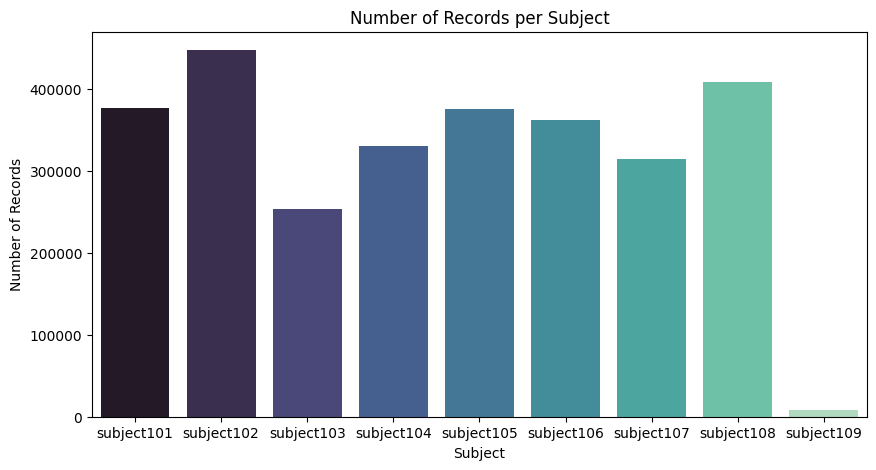

subject
subject101    376417
subject102    447000
subject103    252833
subject104    329576
subject105    374783
subject106    361817
subject107    313599
subject108    408031
subject109      8477
Name: count, dtype: int64


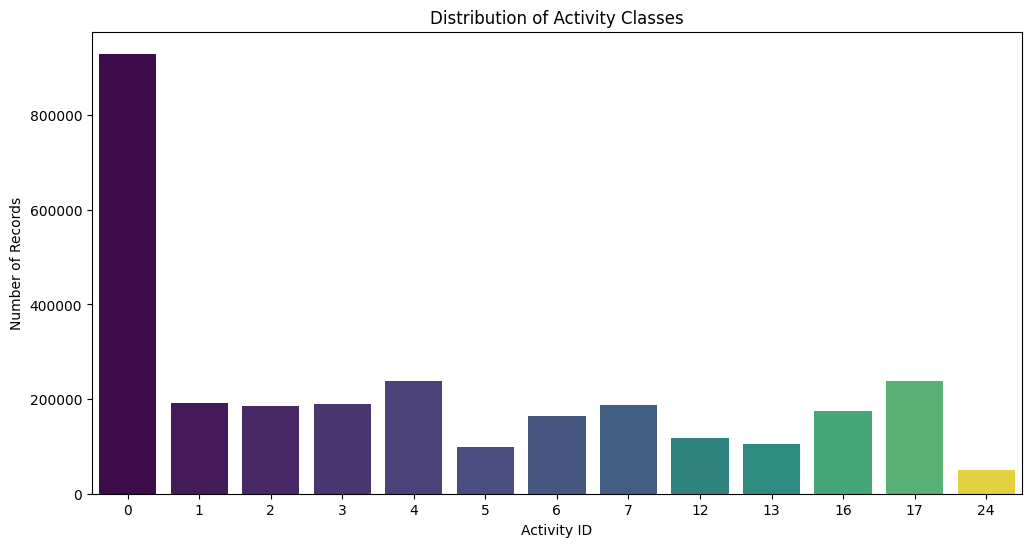

activity_id
0     929661
1     192523
2     185188
3     189931
4     238761
5      98199
6     164600
7     188107
12    117216
13    104944
16    175353
17    238690
24     49360
Name: count, dtype: int64


In [4]:
# Visualize the number of records per subject
subject_counts = data['subject'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=subject_counts.index, y=subject_counts.values, hue=subject_counts.index, palette='mako', legend=False)
plt.xlabel('Subject')
plt.ylabel('Number of Records')
plt.title('Number of Records per Subject')
plt.show()

print(subject_counts)

# Visualize the distribution of activity classes
activity_counts = data['activity_id'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=activity_counts.index, y=activity_counts.values, hue=activity_counts.index, palette='viridis', legend=False)
plt.xlabel('Activity ID')
plt.ylabel('Number of Records')
plt.title('Distribution of Activity Classes')
plt.show()

print(activity_counts)

### Interpretation

The subject-wise distribution shows that most subjects contributed a large number of records (ranging from about 250,000 to 447,000), except for subject109, who contributed only 8,477 records. This indicates a significant imbalance in subject representation, which should be considered during modeling and evaluation.

The activity distribution reveals that some activities (such as activity_id 0, which likely represents transient or unlabeled periods) are much more frequent than others. Activities like 1, 2, 3, 4, 7, 16, and 17 are well represented, while activities such as 5, 24, and especially 109 are much less frequent. This class imbalance may affect model performance and should be addressed during preprocessing or model evaluation.

Overall, the dataset is imbalanced both in terms of subject and activity representation, which is a common challenge in real-world sensor data.

## 2.3 Missing Values Analysis

In this step, I will further analyze the missing values in the dataset, visualize their distribution, and identify patterns that may inform the preprocessing strategy.

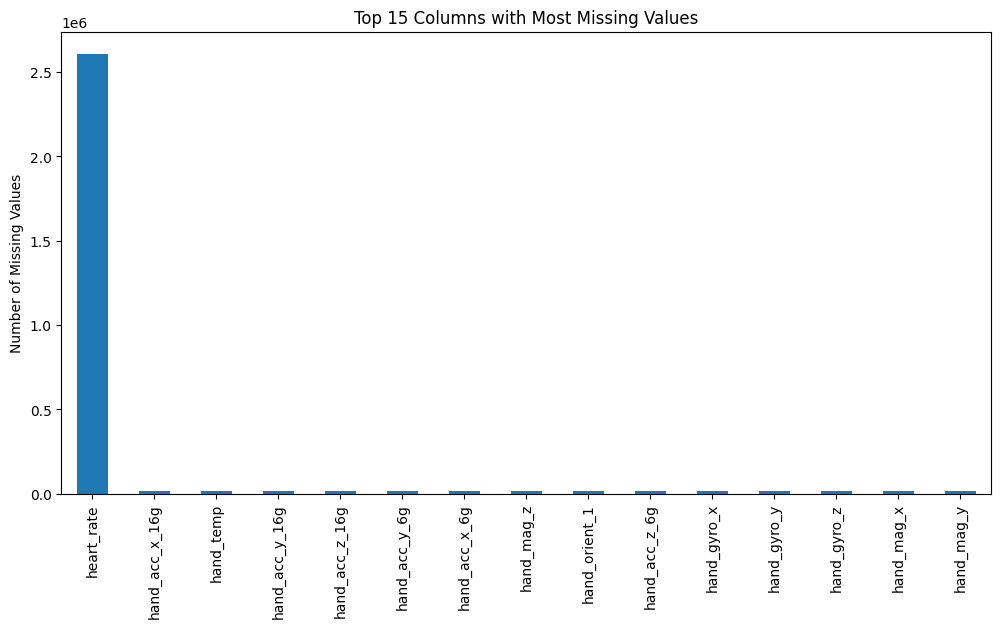

In [5]:
# Bar plot of missing values per column (top 15)
missing_counts = data.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]
plt.figure(figsize=(12,6))
missing_counts.head(15).plot(kind='bar')
plt.ylabel('Number of Missing Values')
plt.title('Top 15 Columns with Most Missing Values')
plt.show()

### Interpretation

The bar plot of missing values reveals that the vast majority of missing data is concentrated in the `heart_rate` column, with over 2.6 million missing entries. All other columns have a negligible number of missing values in comparison, making their bars almost invisible on the same scale. This indicates that missing data handling will primarily focus on the `heart_rate` feature, while the rest of the dataset is largely complete. This pattern is expected, as heart rate is typically sampled at a much lower frequency than IMU sensor data.

## 2.4 Correlation Analysis

In this step, I will analyze the correlations between the main sensor features to identify highly correlated variables, potential redundancies, and relationships that may inform feature selection or engineering.

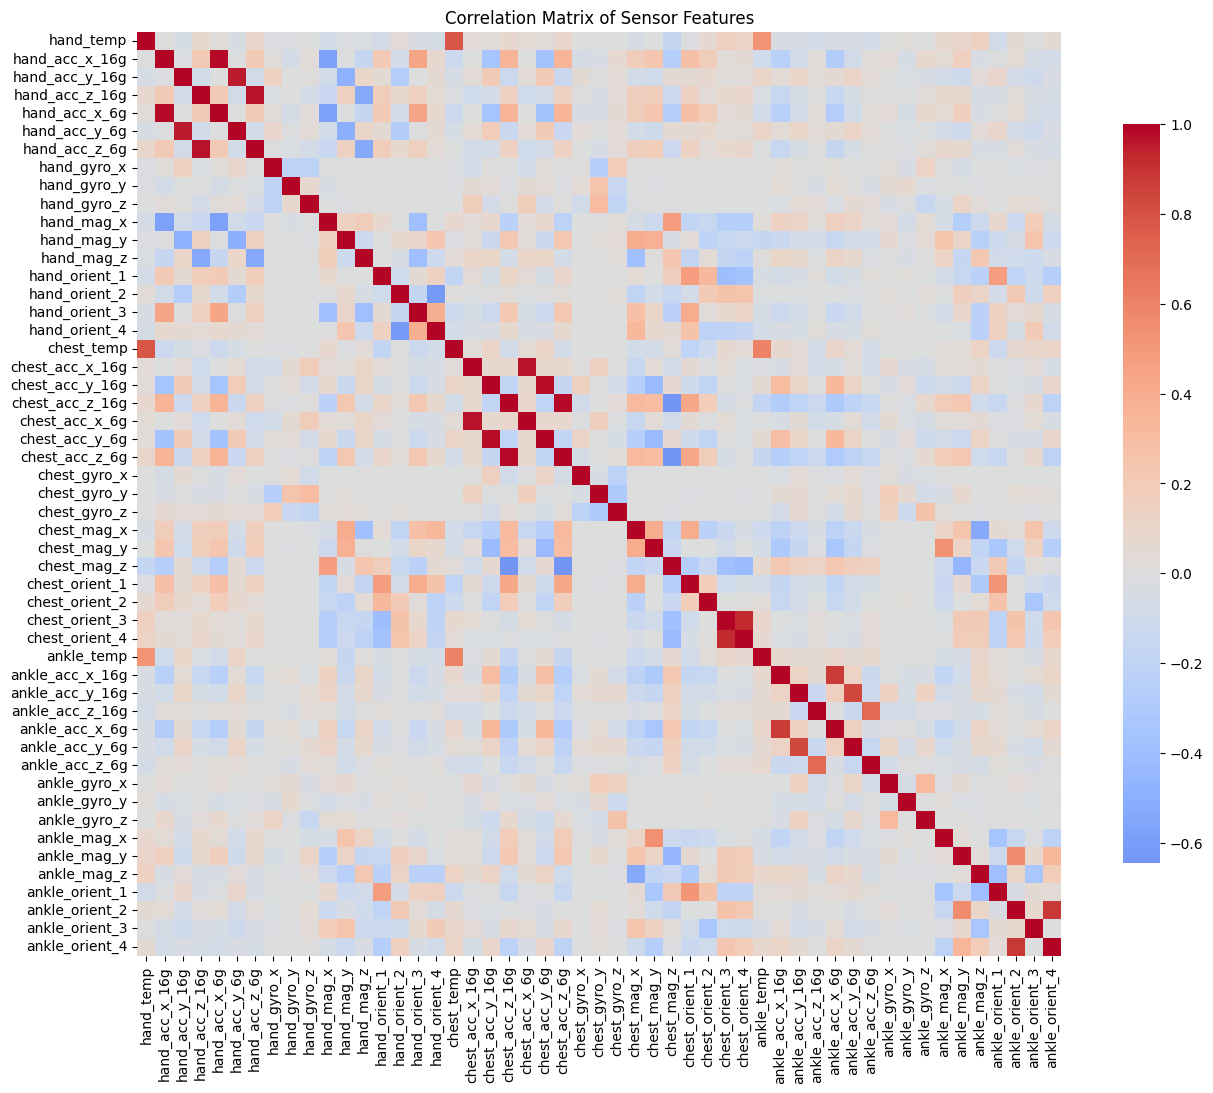

In [6]:
# Compute and visualize the correlation matrix for key sensor features
sensor_columns = [col for col in data.columns if any(sensor in col for sensor in ['acc', 'gyro', 'mag', 'orient', 'temp'])]
corr_matrix = data[sensor_columns].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Sensor Features')
plt.show()

## 2.5 Distribution of Key Sensor Features

In this step, I will visualize the distributions of selected key sensor features to understand their value ranges, detect skewness, and identify any anomalies or outliers.

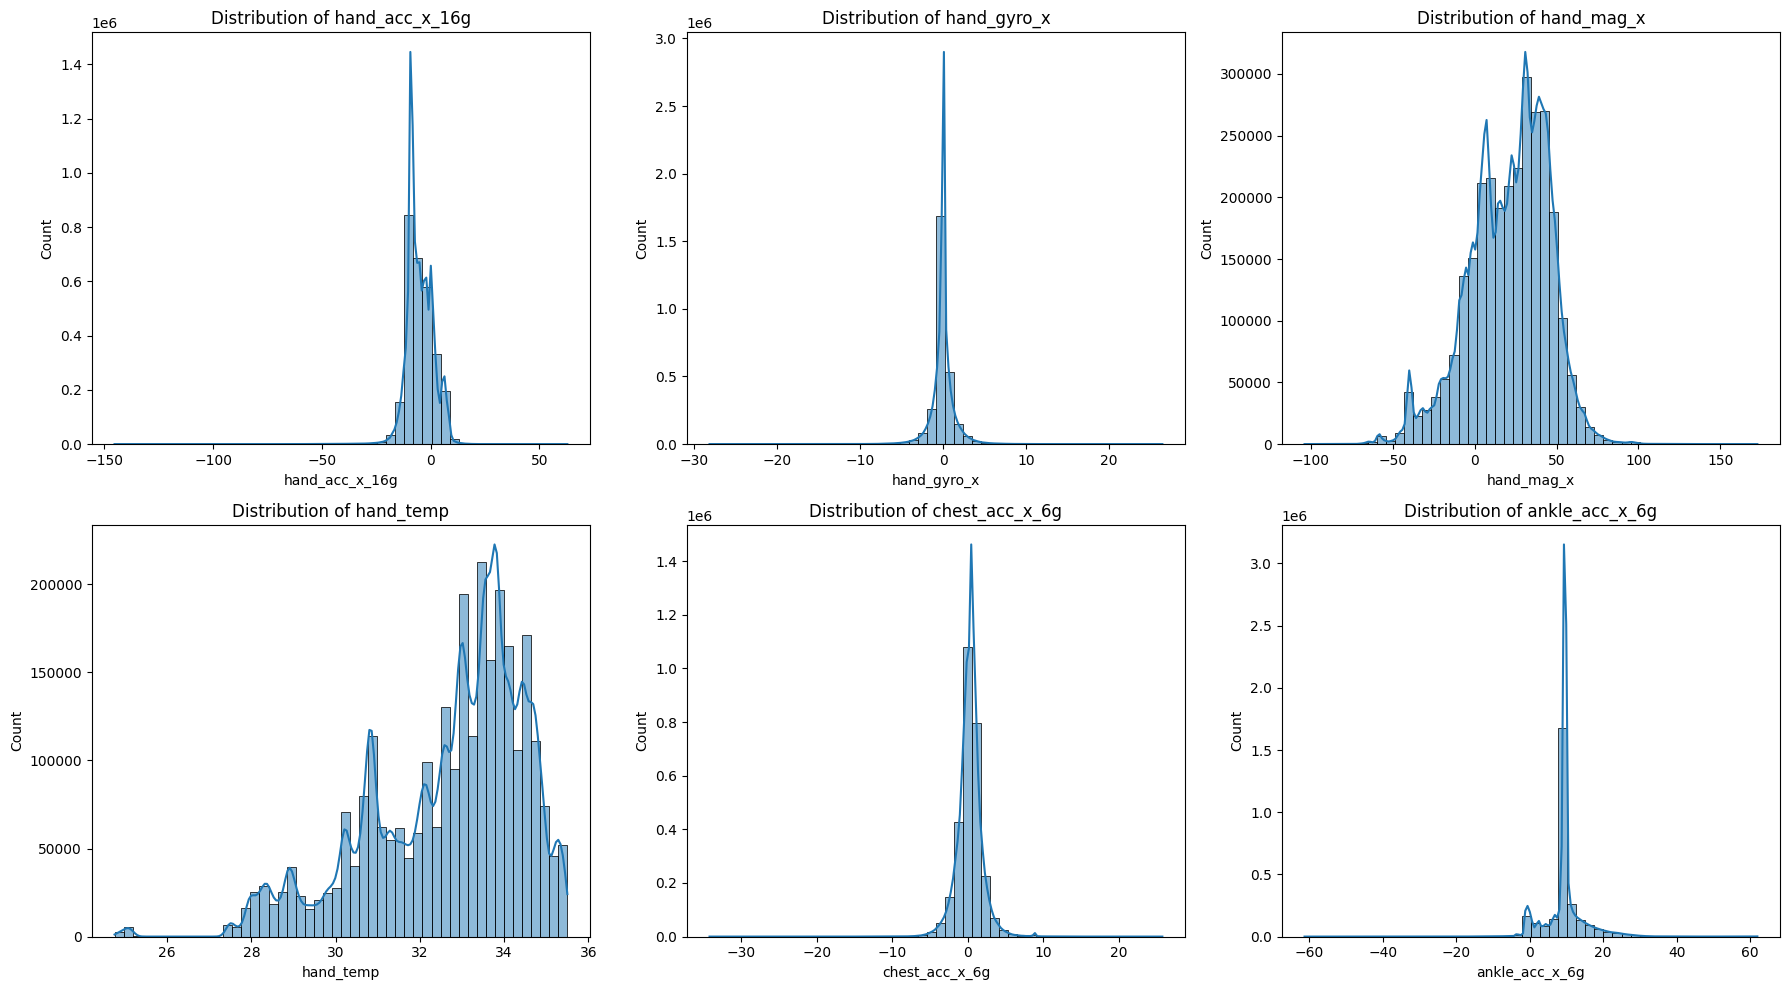

In [7]:
# Visualize distributions for a few representative sensor features
key_features = ['hand_acc_x_16g', 'hand_gyro_x', 'hand_mag_x', 'hand_temp', 'chest_acc_x_6g', 'ankle_acc_x_6g']
plt.figure(figsize=(18, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

## 2.6 Heart Rate Across Activities

In this step, I analyze how **heart rate varies across activity classes**. This helps validate that heart rate contains meaningful physiological signals related to activity intensity, and it also highlights activities where heart rate values are sparse (due to the lower sampling rate of the heart-rate sensor).

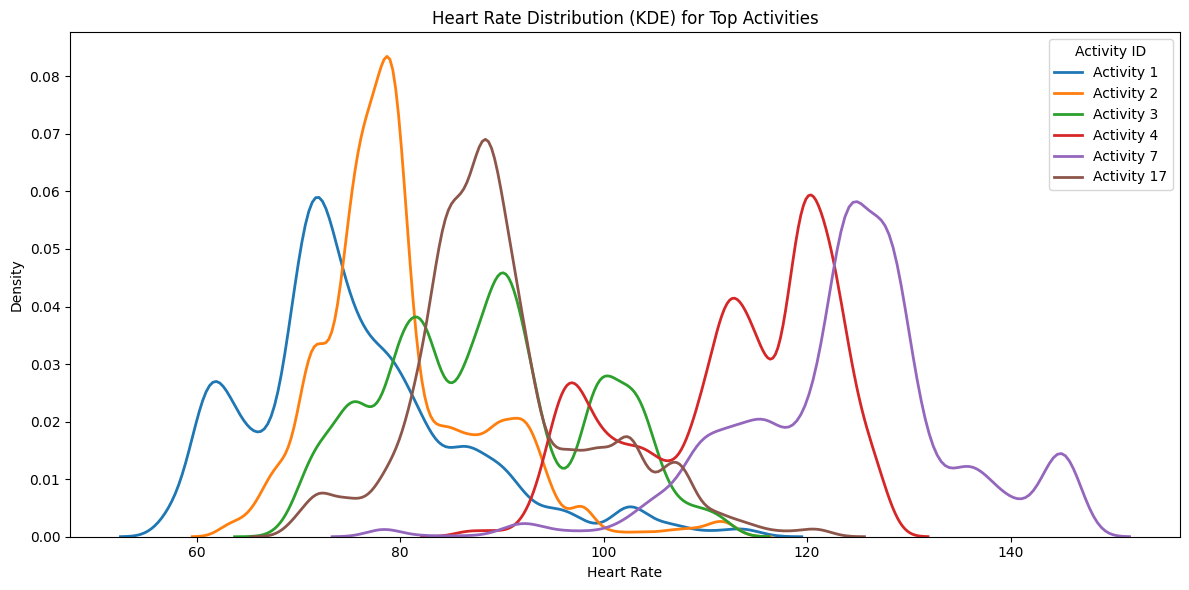

In [ ]:
# Heart rate distribution across activities
# Exclude transient/unlabeled activity (0) for clearer interpretation
hr_df = data.loc[data['activity_id'] != 0, ['activity_id', 'heart_rate']].copy()
hr_df = hr_df.dropna(subset=['heart_rate'])

# For clarity, plot only the most common activities (top 6 by count)
top_activities = hr_df['activity_id'].value_counts().head(6).index.tolist()
plot_df = hr_df[hr_df['activity_id'].isin(top_activities)]

plt.figure(figsize=(12, 6))
for act in sorted(top_activities):
    sns.kdeplot(plot_df.loc[plot_df['activity_id'] == act, 'heart_rate'], label=f'Activity {act}', linewidth=2)
plt.title('Heart Rate Distribution (KDE) for Top Activities')
plt.xlabel('Heart Rate')
plt.ylabel('Density')
plt.legend(title='Activity ID')
plt.tight_layout()
plt.show()

## 2.7 Heart Rate Availability (Missingness) by Subject and Activity

Heart rate is sampled at a lower frequency than the IMU sensors, so missingness is expected. Here, I quantify **how much heart rate data is available** per subject and per activity, which helps explain why some activities may be harder to model if heart rate coverage is limited.

Total available: 177408
Total missing: 1765464
Overall fraction available: 0.09131224290637778


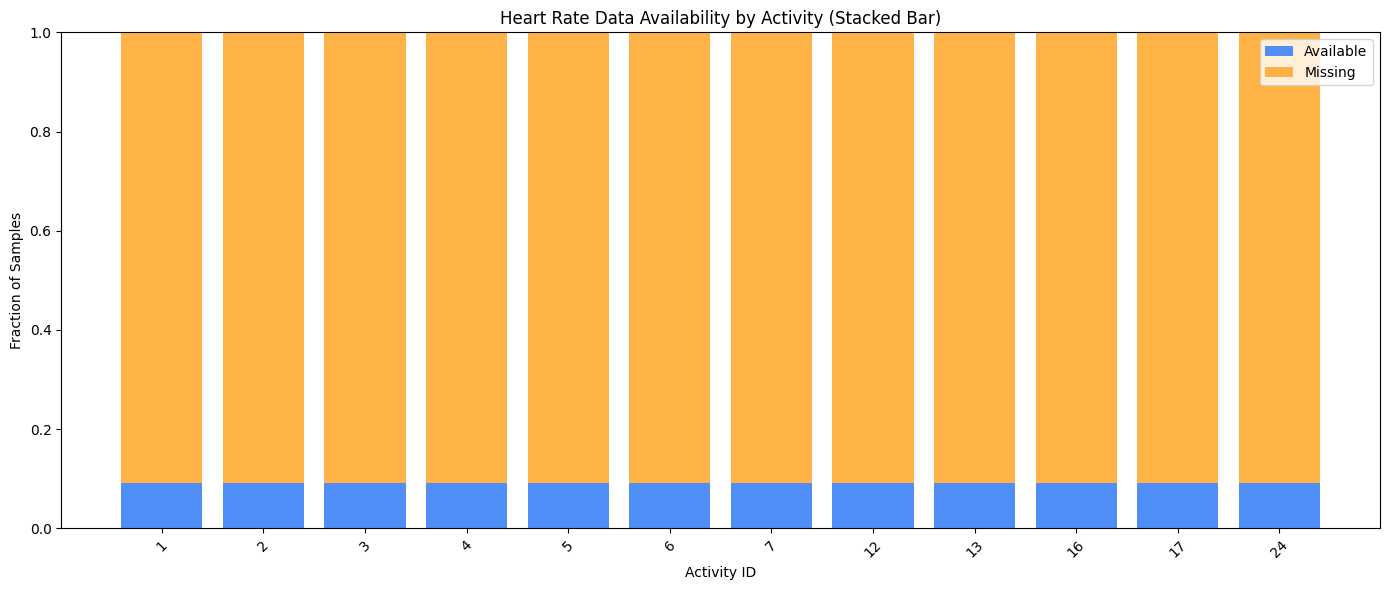

In [ ]:
# Heart rate availability (available vs missing) by activity
df_hr = data.loc[data['activity_id'] != 0, ['activity_id', 'heart_rate']].copy()

# Calculate available and missing counts per activity
avail_stats = (
    df_hr.groupby('activity_id')['heart_rate']
    .apply(lambda x: pd.Series({
        'available': x.notna().sum(),
        'missing': x.isna().sum()
    }))
    .unstack()
    .astype(int)
    .sort_index()
 )
avail_stats['total'] = avail_stats['available'] + avail_stats['missing']
avail_stats['available_frac'] = avail_stats['available'] / avail_stats['total']
avail_stats['missing_frac'] = avail_stats['missing'] / avail_stats['total']

# Print summary: is there really more missing than available?
print('Total available:', avail_stats['available'].sum())
print('Total missing:', avail_stats['missing'].sum())
print('Overall fraction available:', avail_stats['available'].sum() / avail_stats['total'].sum())

# Improved stacked bar plot: available vs missing, with all activity IDs labeled and better colors
plt.figure(figsize=(14, 6))
bar1 = plt.bar(avail_stats.index.astype(str), avail_stats['available_frac'], label='Available', color='#4F8EF7')
bar2 = plt.bar(avail_stats.index.astype(str), avail_stats['missing_frac'], bottom=avail_stats['available_frac'], label='Missing', color='#FFB347')
plt.title('Heart Rate Data Availability by Activity (Stacked Bar)')
plt.xlabel('Activity ID')
plt.ylabel('Fraction of Samples')
plt.ylim(0, 1)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 2.8 Hand, Chest, and Ankle Accelerometer Magnitude Across Activities

In this step, I analyze the distribution of the **signal magnitude** for the hand, chest, and ankle accelerometer sensors across activities. This helps to understand how overall movement intensity varies by activity and sensor location.

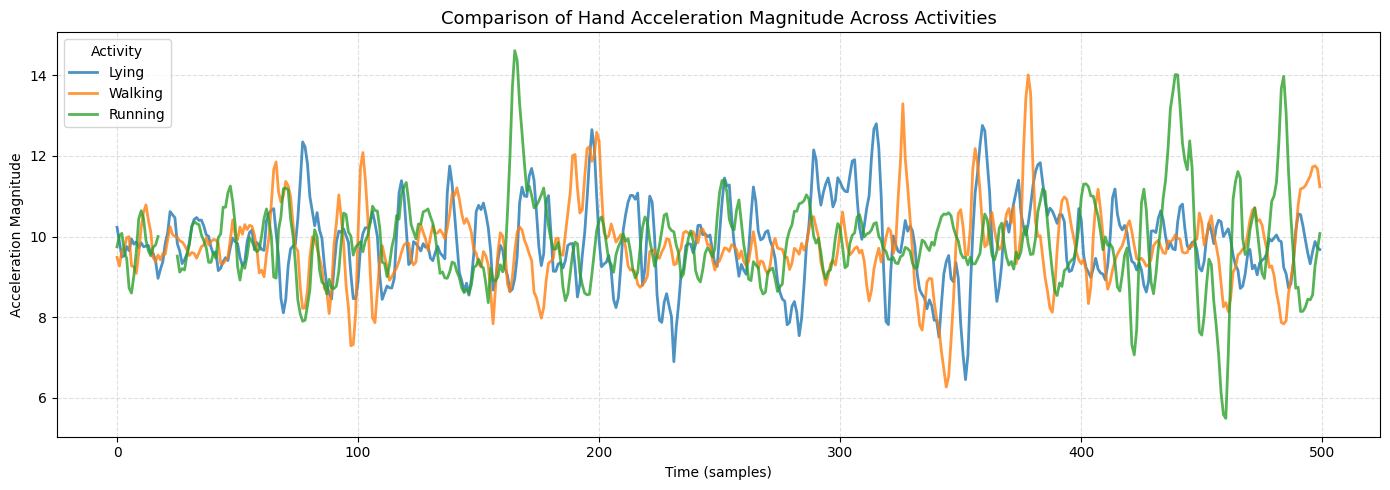

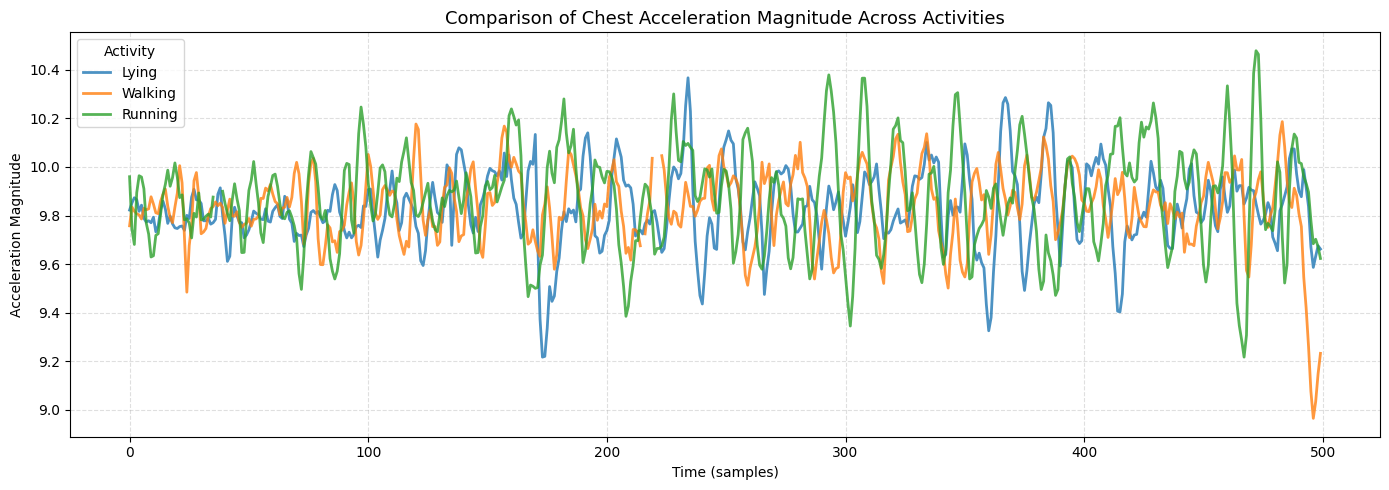

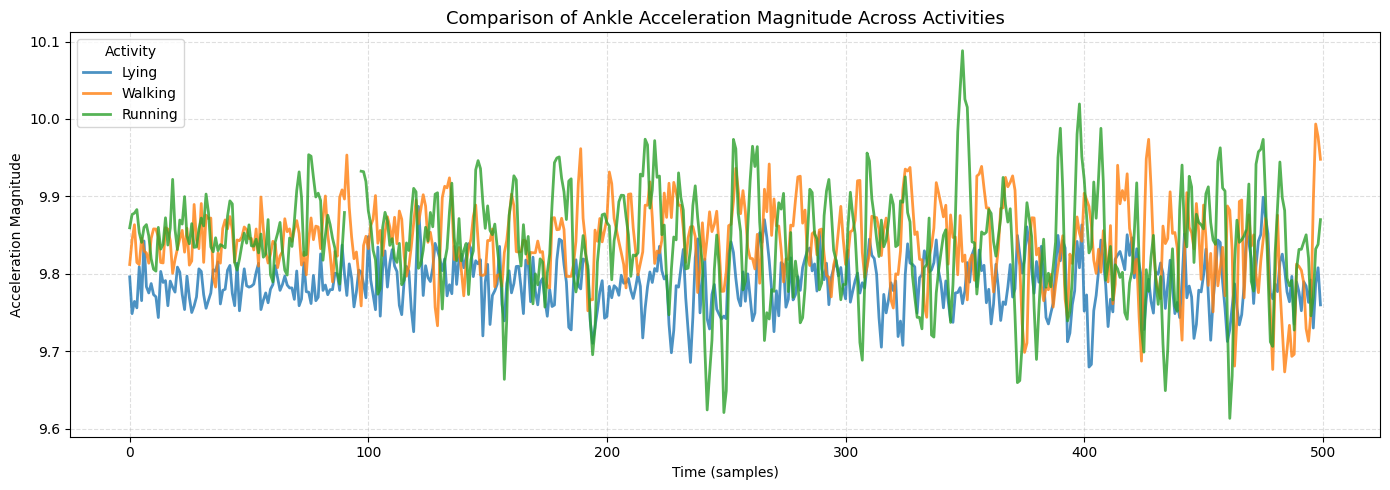

In [ ]:
# Hand, Chest, and Ankle Acceleration Magnitude (Time Series) Across Activities
activities = {
    1: "Lying",
    4: "Walking",
    5: "Running"
}

sensor_configs = [
    ('hand', ['hand_acc_x_16g', 'hand_acc_y_16g', 'hand_acc_z_16g'], 'Hand'),
    ('chest', ['chest_acc_x_6g', 'chest_acc_y_6g', 'chest_acc_z_6g'], 'Chest'),
    ('ankle', ['ankle_acc_x_6g', 'ankle_acc_y_6g', 'ankle_acc_z_6g'], 'Ankle'),
 ]

for prefix, cols, sensor_name in sensor_configs:
    if not all(c in data.columns for c in cols):
        continue  
    plt.figure(figsize=(14, 5))
    for act, name in activities.items():
        temp = data[data['activity_id'] == act].iloc[:500]
        acc_x = temp[cols[0]].values
        acc_y = temp[cols[1]].values
        acc_z = temp[cols[2]].values
        magnitude = np.sqrt(acc_x**2 + acc_y**2 + acc_z**2)
        plt.plot(magnitude, label=name, linewidth=2, alpha=0.8)
    plt.title(f"Comparison of {sensor_name} Acceleration Magnitude Across Activities", fontsize=13)
    plt.xlabel("Time (samples)")
    plt.ylabel("Acceleration Magnitude")
    plt.legend(title="Activity")
    plt.grid(linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

# 3. Preprocessing

This section covers the preprocessing steps required to prepare the data for modeling, including removal of transient activities, handling of missing values, outlier removal, and normalization/scaling.

## 3.1 Remove Transient Activities

In this step, I will remove records corresponding to transient or unlabeled activities (e.g., activity_id 0) to focus the analysis on well-defined activity classes. This helps improve the quality of the training data for classification tasks.

In [33]:
# Remove records with transient or unlabeled activities (e.g., activity_id == 0)
initial_shape = data.shape
clean_data = data[data['activity_id'] != 0].copy()
final_shape = clean_data.shape
print(f'Removed {initial_shape[0] - final_shape[0]} records with transient activities.')
print(f'Shape after removal: {final_shape}')

Removed 929661 records with transient activities.
Shape after removal: (1942872, 55)


## 3.2 Handle Missing Values

In this step, I will address missing values in the dataset. The primary focus will be on the 'heart_rate' column, which contains a large number of missing entries, while other features have minimal missingness. Appropriate imputation or removal strategies will be applied as needed.

In [34]:
# Handle missing values safely (no cross-subject leakage)

# Heart rate is sampled at a lower rate, so we fill it *within each subject* after sorting by time.
# This prevents values from one subject bleeding into another.
clean_data = clean_data.sort_values(['subject', 'timestamp']).copy()
clean_data['heart_rate'] = (
    clean_data.groupby('subject', sort=False)['heart_rate']
    .apply(lambda s: s.ffill().bfill())
    .reset_index(level=0, drop=True)
 )

# For other columns with very few missing values, drop remaining missing rows
clean_data = clean_data.dropna()
print(f"Shape after handling missing values: {clean_data.shape}")

Shape after handling missing values: (1921431, 55)


# 4. Feature Engineering

This section covers the creation and selection of features to improve model performance. It includes selecting the most relevant features and creating additional features if beneficial.

## 4.1 Feature Selection

In this step, I identify the **top 30 most informative original features** using Random Forest feature importance.

To avoid leakage, I compute feature importance **using only the training subjects**. I then use these top 30 features for the window-based dataset and for model training in Step 5.

In [ ]:
# Select top-30 original features using Random Forest importances (train subjects only)
from sklearn.ensemble import RandomForestClassifier

# Fixed subject-wise split (used consistently in Step 5)
train_subjects = [f"subject{i}" for i in [101, 102, 103, 105, 106, 108, 109]]
val_subjects = ["subject104"]
test_subjects = ["subject107"]

# Candidate original feature columns (no engineered/window columns here)
feature_cols = [c for c in clean_data.columns if c not in ['timestamp', 'activity_id', 'subject']]
all_features = feature_cols  # keep for reference

# Use only training subjects for feature selection (prevents leakage)
train_df_fs = clean_data[clean_data['subject'].isin(train_subjects)].copy()

# Keep runtime reasonable: fit on a random sample
max_rows = 80_000
if len(train_df_fs) > max_rows:
    train_df_fs = train_df_fs.sample(n=max_rows, random_state=42)

X_fs = train_df_fs[feature_cols]
y_fs = train_df_fs['activity_id']

rf_fs = RandomForestClassifier(
    n_estimators=150,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced_subsample',
 )
rf_fs.fit(X_fs, y_fs)

feature_importance_df = (
    pd.DataFrame({'feature': feature_cols, 'importance': rf_fs.feature_importances_})
    .sort_values('importance', ascending=False)
    .reset_index(drop=True)
 )

top_k = 30
top_features = feature_importance_df['feature'].head(top_k).tolist()

print(f"Top {top_k} features selected for training:")
print(top_features)
display(feature_importance_df.head(top_k))

Top 30 features selected for training:
['heart_rate', 'chest_temp', 'hand_temp', 'ankle_temp', 'chest_mag_y', 'chest_acc_z_6g', 'chest_acc_z_16g', 'chest_mag_z', 'hand_acc_x_6g', 'chest_orient_1', 'ankle_mag_z', 'chest_mag_x', 'hand_acc_x_16g', 'ankle_mag_x', 'hand_acc_z_6g', 'chest_acc_y_16g', 'chest_acc_y_6g', 'hand_acc_z_16g', 'chest_orient_2', 'hand_mag_x', 'chest_orient_4', 'chest_orient_3', 'ankle_orient_3', 'ankle_orient_1', 'hand_mag_z', 'ankle_acc_x_6g', 'ankle_acc_x_16g', 'chest_gyro_y', 'ankle_orient_4', 'hand_mag_y']


,feature,importance
0,heart_rate,0.105099
1,chest_temp,0.083949
2,hand_temp,0.080382
3,ankle_temp,0.067231
4,chest_mag_y,0.042430
5,chest_acc_z_6g,0.040003
6,chest_acc_z_16g,0.038595
7,chest_mag_z,0.031701
8,hand_acc_x_6g,0.023832
9,chest_orient_1,0.023150


The Random Forest model was trained to estimate the importance of each feature in predicting the activity. The top 30 features, as listed above, are considered the most informative for distinguishing between different activities. These features will be used for further modeling and analysis in the next steps.

## 4.2 Window-Based Feature Dataset

In this section, I create a **window-level** dataset (sliding windows) and extract simple statistical features per window. This setup is commonly used in HAR because it summarizes the signal over time and usually improves performance compared to classifying each timestamp independently.

To avoid label mixing, I build windows **within each subject** and **within contiguous activity segments** (windows do not cross activity boundaries).

In [43]:
# Build a window-level feature dataset (mean/std/min/max per feature)
import numpy as np
import pandas as pd

def build_window_features(
    df: pd.DataFrame,
    feature_cols: list[str],
    window_size: int = 200,
    step_size: int = 100,
    min_segment_len: int | None = None,
    verbose: bool = True,
 ) -> pd.DataFrame:
    """Create a window-level dataset without crossing activity boundaries.

    Windows are built within each subject and within contiguous activity segments.
    """
    if min_segment_len is None:
        min_segment_len = window_size
    df = df.sort_values(['subject', 'timestamp']).copy()

    out_rows: list[dict] = []
    if verbose:
        print('Building window features...')
        print(f'- window_size={window_size}, step_size={step_size}')
        print(f'- num_features={len(feature_cols)}')

    for subject, sdf in df.groupby('subject', sort=False):
        sdf = sdf.sort_values('timestamp').copy()
        sdf['segment_id'] = sdf['activity_id'].ne(sdf['activity_id'].shift(1)).cumsum().astype(np.int32)

        for seg_id, g in sdf.groupby('segment_id', sort=False):
            activity = int(g['activity_id'].iloc[0])
            n = len(g)
            if n < min_segment_len:
                continue
            X = g[feature_cols].to_numpy(dtype=np.float32, copy=False)
            for start in range(0, n - window_size + 1, step_size):
                w = X[start:start + window_size]
                means = w.mean(axis=0)
                stds = w.std(axis=0)
                mins = w.min(axis=0)
                maxs = w.max(axis=0)

                feat = {
                    'subject': subject,
                    'activity_id': activity,
                    'segment_id': int(seg_id),
                }
                for j, col in enumerate(feature_cols):
                    feat[f'{col}__mean'] = float(means[j])
                    feat[f'{col}__std'] = float(stds[j])
                    feat[f'{col}__min'] = float(mins[j])
                    feat[f'{col}__max'] = float(maxs[j])
                out_rows.append(feat)

    window_df = pd.DataFrame(out_rows)
    if verbose:
        print(f'Window dataset shape: {window_df.shape}')
        print('Example columns:', list(window_df.columns[:8]), '...')
    return window_df

# Build windows using ONLY the top-20 original features selected in Section 4.1
window_df = build_window_features(
    clean_data,
    feature_cols=top_features,
    window_size=200,
    step_size=100,
    verbose=True,
 )
window_df.head()

Building window features...
- window_size=200, step_size=100
- num_features=30
Window dataset shape: (19052, 123)
Example columns: ['subject', 'activity_id', 'segment_id', 'heart_rate__mean', 'heart_rate__std', 'heart_rate__min', 'heart_rate__max', 'chest_temp__mean'] ...


Building window features...
- window_size=200, step_size=100
- num_features=30
Window dataset shape: (19052, 123)
Example columns: ['subject', 'activity_id', 'segment_id', 'heart_rate__mean', 'heart_rate__std', 'heart_rate__min', 'heart_rate__max', 'chest_temp__mean'] ...


,subject,activity_id,segment_id,heart_rate__mean,heart_rate__std,heart_rate__min,heart_rate__max,chest_temp__mean,chest_temp__std,chest_temp__min,...,chest_gyro_y__min,chest_gyro_y__max,ankle_orient_4__mean,ankle_orient_4__std,ankle_orient_4__min,ankle_orient_4__max,hand_mag_y__mean,hand_mag_y__std,hand_mag_y__min,hand_mag_y__max
0,subject101,1,1,100.760002,0.427083,100.0,101.0,32.231564,0.028503,32.1875,...,-0.068456,0.520553,0.0,0.0,0.0,0.0,-65.785080,1.702124,-68.116096,-62.033298
1,subject101,1,1,101.385002,0.486595,101.0,102.0,32.250000,0.000000,32.2500,...,-0.028872,0.520553,0.0,0.0,0.0,0.0,-65.677086,1.713806,-68.543198,-61.902802
2,subject101,1,1,101.885002,0.319022,101.0,102.0,32.250000,0.000000,32.2500,...,-0.118042,0.407184,0.0,0.0,0.0,0.0,-64.791267,1.837088,-68.543198,-61.533798
3,subject101,1,1,102.000000,0.000000,102.0,102.0,32.250000,0.000000,32.2500,...,-0.156101,0.198002,0.0,0.0,0.0,0.0,-64.499542,1.585906,-67.159203,-61.533798
4,subject101,1,1,102.000000,0.000000,102.0,102.0,32.250000,0.000000,32.2500,...,-0.156101,0.198002,0.0,0.0,0.0,0.0,-66.167610,1.857769,-69.761902,-61.912701


# 5. Modeling

In this section, I train and evaluate models using the **window-level dataset** created from the **top 20 selected features**.

- I use a fixed subject-wise split.
- I apply scaling only on the training set using Pipelines.
- I report validation performance for model selection and final performance on the test subject.

## 5.1 Fixed Subject-Wise Split

I use the following fixed split (no subject appears in more than one set):

- **Train:** subject101, subject102, subject103, subject105, subject106, subject108, subject109
- **Validation:** subject104
- **Test:** subject107

In [ ]:
# Prepare window-level train/validation/test sets (top-30 features only)
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import lightgbm as lgb

# Silence LightGBM native logging
try:
    lgb.set_config(verbosity=-1)
except Exception:
    pass

# Fixed subject-wise split (same as Section 4.1)
train_subjects = [f"subject{i}" for i in [101, 102, 103, 105, 106, 108, 109]]
val_subjects = ["subject104"]
test_subjects = ["subject107"]

# Window features created from top_features => window_df contains only those window columns
window_feature_cols = [c for c in window_df.columns if c not in ['subject', 'activity_id', 'segment_id']]
train_mask = window_df['subject'].isin(train_subjects)
val_mask = window_df['subject'].isin(val_subjects)
test_mask = window_df['subject'].isin(test_subjects)

Xw_train = window_df.loc[train_mask, window_feature_cols]
yw_train = window_df.loc[train_mask, 'activity_id']
Xw_val = window_df.loc[val_mask, window_feature_cols]
yw_val = window_df.loc[val_mask, 'activity_id']
Xw_test = window_df.loc[test_mask, window_feature_cols]
yw_test = window_df.loc[test_mask, 'activity_id']

# XGBoost expects class labels to be consecutive integers (0..K-1) for multi-class objectives.
# I encode activity_id once and use encoded labels consistently for all models/metrics.
label_encoder = LabelEncoder()
label_encoder.fit(window_df['activity_id'])
n_classes = int(len(label_encoder.classes_))

yw_train_enc = pd.Series(label_encoder.transform(yw_train), index=yw_train.index)
yw_val_enc = pd.Series(label_encoder.transform(yw_val), index=yw_val.index)
yw_test_enc = pd.Series(label_encoder.transform(yw_test), index=yw_test.index)

print('Window split shapes:')
print(f"- Train: {Xw_train.shape} | Val: {Xw_val.shape} | Test: {Xw_test.shape}")
print(f"Number of classes (activities): {n_classes}")

Window split shapes:
- Train: (14500, 120) | Val: (2266, 120) | Test: (2286, 120)
Number of classes (activities): 12


## 5.2 Baseline Model Training

In this subsection, I train baseline models (Random Forest, SVM, LightGBM, XGBoost) using the window-level dataset built from the top 30 features. I compare models on validation subject104.

In [ ]:
# Baseline models (training on train subjects, evaluated on validation subject104)
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier
import pandas as pd

# Silence LightGBM native logging
try:
    lgb.set_config(verbosity=-1)
except Exception:
    pass

print(f"Number of window features used: {Xw_train.shape[1]}")

baseline_models = {
    'Random Forest': RandomForestClassifier(n_estimators=600, random_state=42, n_jobs=-1),
    'SVM (scaled)': Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', C=10, gamma='scale', random_state=42)),
    ]),
    'LightGBM': lgb.LGBMClassifier(
        n_estimators=1500,
        learning_rate=0.05,
        num_leaves=63,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        verbose=-1,
        force_col_wise=True,
    ),
    'XGBoost': XGBClassifier(
        n_estimators=1200,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_lambda=1.0,
        min_child_weight=1,
        num_class=n_classes,
        objective='multi:softprob',
        eval_metric='mlogloss',
        tree_method='hist',
        n_jobs=-1,
        random_state=42,
        verbosity=0,
    ),
}

baseline_results = {}
for name, model in baseline_models.items():
    model.fit(Xw_train, yw_train_enc)
    pred = model.predict(Xw_val)
    acc = accuracy_score(yw_val_enc, pred)
    f1 = f1_score(yw_val_enc, pred, average='weighted')
    baseline_results[name] = {'val_accuracy': float(acc), 'val_f1_score': float(f1)}
    print(f"{name} - Val Accuracy: {acc:.4f}, Val F1: {f1:.4f}")

baseline_summary = (
    pd.DataFrame(baseline_results).T
    .sort_values(['val_accuracy', 'val_f1_score'], ascending=False)
 )
print('\nBaseline validation summary (sorted):')
display(baseline_summary)

Number of window features used: 120
Random Forest - Val Accuracy: 0.8844, Val F1: 0.8824
SVM (scaled) - Val Accuracy: 0.9325, Val F1: 0.9360
LightGBM - Val Accuracy: 0.7829, Val F1: 0.7797
XGBoost - Val Accuracy: 0.8491, Val F1: 0.8564

Baseline validation summary (sorted):


Number of window features used: 120
Random Forest - Val Accuracy: 0.8844, Val F1: 0.8824
SVM (scaled) - Val Accuracy: 0.9325, Val F1: 0.9360
LightGBM - Val Accuracy: 0.7829, Val F1: 0.7797
XGBoost - Val Accuracy: 0.8491, Val F1: 0.8564

Baseline validation summary (sorted):


,val_accuracy,val_f1_score
SVM (scaled),0.932480,0.936030
Random Forest,0.884378,0.882355
XGBoost,0.849073,0.856438
LightGBM,0.782877,0.779700


## 5.3 Hyperparameter Tuning

In this subsection, I tune model hyperparameters using the training subjects and I choose the best configuration based on validation subject104.
I expand the search space (larger grids) and evaluate a bounded number of sampled configurations so the tuning is more reliable without becoming too slow.

In [52]:
# Hyperparameter tuning (select best on validation subject104)
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import lightgbm as lgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

# Silence LightGBM native logging
try:
    lgb.set_config(verbosity=-1)
except Exception:
    pass

rng = np.random.default_rng(42)

def sample_param_grid(grid: dict, max_evals: int) -> list[dict]:
    params_list = list(ParameterGrid(grid))
    if len(params_list) <= max_evals:
        return params_list
    idx = rng.choice(len(params_list), size=max_evals, replace=False)
    return [params_list[i] for i in idx]

def stratified_downsample(X: pd.DataFrame, y: pd.Series, max_rows: int, seed: int = 42):
    """Downsample (roughly) stratified by class to keep tuning fast."""
    if len(X) <= max_rows:
        return X, y
    rs = np.random.default_rng(seed)
    y_arr = np.asarray(y)
    classes, counts = np.unique(y_arr, return_counts=True)
    per_class = np.maximum(1, (counts / counts.sum() * max_rows).astype(int))
    idx_parts = []
    for c, k in zip(classes, per_class):
        cls_idx = np.flatnonzero(y_arr == c)
        k = min(k, len(cls_idx))
        idx_parts.append(rs.choice(cls_idx, size=k, replace=False))
    idx = np.concatenate(idx_parts)
    if len(idx) < max_rows:
        remaining = max_rows - len(idx)
        pool = np.setdiff1d(np.arange(len(X)), idx, assume_unique=False)
        if len(pool) > 0:
            extra = rs.choice(pool, size=min(remaining, len(pool)), replace=False)
            idx = np.concatenate([idx, extra])
    idx = rs.permutation(idx)
    return X.iloc[idx], y.iloc[idx]

# Tune on a stratified sample so this finishes in a notebook environment.
max_tune_rows = 12000
Xw_tune, yw_tune = stratified_downsample(Xw_train, yw_train_enc, max_rows=max_tune_rows, seed=42)

max_evals = {
    'SVM': 12,
    'LightGBM': 25,
    'XGBoost': 25,
}

tuning_candidates = []
candidate_id = 0

# 1) SVM tuning (scaled, sampled configs)
svm_grid = {
    'C': [0.3, 1, 3, 10, 30],
    'gamma': ['scale', 0.001, 0.01, 0.1],
}
for params in sample_param_grid(svm_grid, max_evals['SVM']):
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', SVC(kernel='rbf', random_state=42, cache_size=500, **params)),
    ])
    model.fit(Xw_tune, yw_tune)
    pred = model.predict(Xw_val)
    acc = accuracy_score(yw_val_enc, pred)
    f1 = f1_score(yw_val_enc, pred, average='weighted')
    tuning_candidates.append({
        'candidate_id': candidate_id,
        'model': 'SVM',
        'params': params,
        'val_accuracy': float(acc),
        'val_f1_score': float(f1),
        'estimator': model,
    })
    candidate_id += 1

# 2) LightGBM tuning (larger grid, sampled)
lgb_grid = {
    'num_leaves': [31, 63, 127],
    'learning_rate': [0.03, 0.05, 0.1],
    'n_estimators': [800, 1500, 2500],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}
for params in sample_param_grid(lgb_grid, max_evals['LightGBM']):
    model = lgb.LGBMClassifier(
        random_state=42,
        n_jobs=-1,
        verbosity=-1,
        verbose=-1,
        force_col_wise=True,
        **params,
    )
    model.fit(Xw_tune, yw_tune)
    pred = model.predict(Xw_val)
    acc = accuracy_score(yw_val_enc, pred)
    f1 = f1_score(yw_val_enc, pred, average='weighted')
    tuning_candidates.append({
        'candidate_id': candidate_id,
        'model': 'LightGBM',
        'params': params,
        'val_accuracy': float(acc),
        'val_f1_score': float(f1),
        'estimator': model,
    })
    candidate_id += 1

# 3) XGBoost tuning (larger grid, sampled)
xgb_grid = {
    'n_estimators': [800, 1200, 2000],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_lambda': [1.0, 2.0, 5.0],
    'min_child_weight': [1, 5, 10],
}
for params in sample_param_grid(xgb_grid, max_evals['XGBoost']):
    model = XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        tree_method='hist',
        n_jobs=-1,
        random_state=42,
        verbosity=0,
        num_class=n_classes,
        **params,
    )
    model.fit(Xw_tune, yw_tune)
    pred = model.predict(Xw_val)
    acc = accuracy_score(yw_val_enc, pred)
    f1 = f1_score(yw_val_enc, pred, average='weighted')
    tuning_candidates.append({
        'candidate_id': candidate_id,
        'model': 'XGBoost',
        'params': params,
        'val_accuracy': float(acc),
        'val_f1_score': float(f1),
        'estimator': model,
    })
    candidate_id += 1


In [53]:
# Find and print the best model for each type
def print_best_model(model_name):
    subset = [c for c in tuning_candidates if c['model'] == model_name]
    if not subset:
        print(f'No candidates for {model_name}')
        return
    best = max(subset, key=lambda c: (c['val_accuracy'], c['val_f1_score']))
    print(f'Best {model_name} model:')
    print(f'  Params: {best["params"]}')
    print(f'  Val Accuracy: {best["val_accuracy"]:.4f}, Val F1: {best["val_f1_score"]:.4f}\n')

print_best_model('SVM')
print_best_model('LightGBM')
print_best_model('XGBoost')

# Select the overall best model for final evaluation
tuning_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'estimator'} for r in tuning_candidates])
tuning_df = tuning_df.sort_values(['val_accuracy', 'val_f1_score'], ascending=False).reset_index(drop=True)

best_id = int(tuning_df.loc[0, 'candidate_id'])
best_tuned = tuning_candidates[best_id]
best_tuned_model_name = best_tuned['model']
best_tuned_params = best_tuned['params']
best_tuned_estimator = best_tuned['estimator']
print(f"Selected tuned model: {best_tuned_model_name} | params={best_tuned_params}")

Best SVM model:
  Params: {'C': 0.3, 'gamma': 'scale'}
  Val Accuracy: 0.9457, Val F1: 0.9466

Best LightGBM model:
  Params: {'colsample_bytree': 0.8, 'learning_rate': 0.03, 'min_child_samples': 100, 'n_estimators': 2500, 'num_leaves': 31, 'subsample': 0.7}
  Val Accuracy: 0.8063, Val F1: 0.8119

Best XGBoost model:
  Params: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 800, 'reg_lambda': 2.0, 'subsample': 0.8}
  Val Accuracy: 0.8694, Val F1: 0.8772

Selected tuned model: SVM | params={'C': 0.3, 'gamma': 'scale'}


## 5.4 Final Model Selection and Test Evaluation

In [54]:
# Final evaluation on the test subject (subject107)
from sklearn.metrics import accuracy_score, f1_score, classification_report

# If tuning was run, use tuned best; otherwise fall back to best baseline
use_tuned = 'best_tuned_estimator' in globals()
if use_tuned:
    final_model_name = f"Tuned {best_tuned_model_name}"
    final_model = best_tuned_estimator
else:
    final_model_name = baseline_summary.index[0]
    final_model = baseline_models[final_model_name]

final_model.fit(Xw_train, yw_train_enc)
test_pred_enc = final_model.predict(Xw_test)
test_acc = accuracy_score(yw_test_enc, test_pred_enc)
test_f1 = f1_score(yw_test_enc, test_pred_enc, average='weighted')

# Convert predictions back to original activity IDs for the report
test_pred = label_encoder.inverse_transform(test_pred_enc.astype(int))
yw_test_orig = yw_test.to_numpy()

print(f"Final model: {final_model_name}")
print(f"Test Accuracy (subject107): {test_acc:.4f}")
print(f"Test F1 (weighted): {test_f1:.4f}")
print('\nTest classification report (original activity_id labels):')
print(classification_report(yw_test_orig, test_pred, digits=4))

Final model: Tuned SVM
Test Accuracy (subject107): 0.9339
Test F1 (weighted): 0.9324

Test classification report (original activity_id labels):
              precision    recall  f1-score   support

           1     0.9551    1.0000    0.9770       255
           2     1.0000    0.9339    0.9658       121
           3     0.8421    1.0000    0.9143       256
           4     0.9067    0.9688    0.9367       321
           5     1.0000    0.7576    0.8621        33
           6     0.9610    0.9911    0.9758       224
           7     0.9928    0.9753    0.9840       283
          12     0.9545    0.7241    0.8235       174
          13     0.8649    0.8496    0.8571       113
          16     0.9942    0.7991    0.8860       214
          17     0.9161    0.9726    0.9435       292

    accuracy                         0.9339      2286
   macro avg     0.9443    0.9065    0.9205      2286
weighted avg     0.9381    0.9339    0.9324      2286



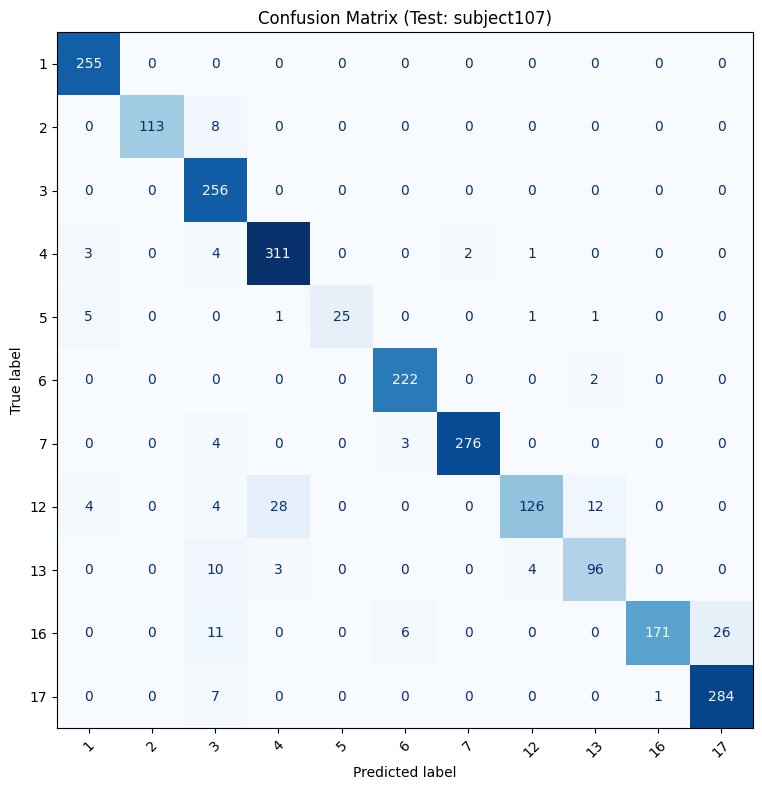

In [55]:
# Confusion matrix (subject107)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use original activity_id labels for interpretation
y_true = np.asarray(yw_test_orig)
y_pred = np.asarray(test_pred)

labels = np.array(sorted(np.unique(np.concatenate([y_true, y_pred]))))
cm = confusion_matrix(y_true, y_pred, labels=labels)

fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45, values_format='d', colorbar=False)
ax.set_title('Confusion Matrix (Test: subject107)')
plt.tight_layout()
plt.show()

# 6. Summary, Results, Challenges, and Future Work


## 6.1 Project Overview

This project focuses on **Human Activity Recognition (HAR)** from wearable sensor data. The main goal was to build a model that generalizes to **unseen subjects**, so the evaluation follows a strict **subject-wise split** (no subject leakage).

At a high level, the workflow in this notebook was:

- Load and combine subject CSV files into a single dataset.
- Clean the labels by removing transient/unlabeled activity segments (e.g., `activity_id = 0`).
- Handle the large amount of missingness in heart-rate **within each subject** (to avoid cross-subject leakage).
- Convert the raw time-series into a **window-level dataset**, extracting statistical features per window.
- Select the **top 30 most informative original features** using a Random Forest trained only on the training subjects.
- Train baseline models, tune hyperparameters, select the best model on validation, and report final performance on the held-out test subject.
- Visualize final behavior using a confusion matrix.

## 6.2 Experimental Setup (Leakage-Safe)

**Subject-wise split (fixed):**

- **Train:** subject101, subject102, subject103, subject105, subject106, subject108, subject109
- **Validation:** subject104
- **Test:** subject107

**Windowing + features:**

- Windows built **within each subject** and **within contiguous activity segments** (windows do not cross activity boundaries).
- Window size = **200**, step size = **100**.
- Top-30 original features, 4 statistics (mean/std/min/max), **120 window features** total.
- Final window dataset sizes (from the executed run):
  - **Train:** 14,500 windows
  - **Validation:** 2,266 windows
  - **Test:** 2,286 windows
  - **Classes:** 12 activities

**Models evaluated:** Random Forest, SVM, LightGBM, and XGBoost.

**Metrics reported:** Accuracy and weighted F1-score (primary), plus the full classification report on the final test set.

## 6.3 Results

### 6.3.1 Baseline Validation Results (subject104)

The baseline models were trained on the training subjects and evaluated on **subject104**:

- **Random Forest:** Val Accuracy = **0.8844**, Val Weighted F1 = **0.8824**
- **SVM (scaled):** Val Accuracy = **0.9325**, Val Weighted F1 = **0.9360**
- **LightGBM:** Val Accuracy = **0.7829**, Val Weighted F1 = **0.7797**
- **XGBoost:** Val Accuracy = **0.8491**, Val Weighted F1 = **0.8564**

### 6.3.2 Best Tuned Models (subject104)

From the hyperparameter tuning runs (sampled configurations):

- **Best SVM:** params = `{'C': 0.3, 'gamma': 'scale'}`
  - Val Accuracy = **0.9457**, Val Weighted F1 = **0.9466**
- **Best LightGBM:** params = `{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'min_child_samples': 100, 'n_estimators': 2500, 'num_leaves': 31, 'subsample': 0.7}`
  - Val Accuracy = **0.8063**, Val Weighted F1 = **0.8119**
- **Best XGBoost:** params = `{'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 800, 'reg_lambda': 2.0, 'subsample': 0.8}`
  - Val Accuracy = **0.8694**, Val Weighted F1 = **0.8772**

**Selected tuned model (best on validation):** **Tuned SVM**

### 6.3.3 Final Test Results (subject107)

Final evaluation was done on the held-out **test subject107** using the selected tuned model:

- **Final Model:** Tuned SVM
- **Test Accuracy (subject107):** **0.9339**
- **Test Weighted F1-score:** **0.9324**
- **Macro average (from report):** precision = **0.9443**, recall = **0.9065**, F1 = **0.9205**

**Per-class highlights (test):**

- Strong performance on several classes (near-perfect recall/precision), e.g., `activity_id` 1, 3, 6, 7, 17.
- Lower performance tends to appear in classes with either lower support or higher similarity to other motions. In the test report, comparatively weaker classes included:
  - `activity_id` 12 (recall **0.7241**, F1 **0.8235**)
  - `activity_id` 5 (recall **0.7576**, F1 **0.8621**)
  - `activity_id` 16 (recall **0.7991**, F1 **0.8860**)

## 6.4 Confusion Matrix Observations

The confusion matrix shows that most predictions fall on the diagonal, confirming strong generalization to an unseen subject. The most noticeable errors are concentrated in a few activity pairs, such as:

- True **12** predicted as **4** (notable count) and also sometimes as **13**.
- True **16** predicted as **17** (a relatively common confusion).
- True **2** occasionally predicted as **3**.

These confusions are typical in HAR when activities have similar motion patterns or transitions, especially when using only simple window statistics (mean/std/min/max).

## 6.5 Key Challenges Faced (and How We Addressed Them)

1. **Avoiding subject leakage**
   - A major risk in HAR is leaking information across subjects (e.g., imputing missing values across subject boundaries, or fitting scalers on the full dataset).
   - We prevented this by imputing heart rate **within each subject** and using leakage-safe preprocessing patterns (e.g., scaling within Pipelines).

2. **Very high heart-rate missingness**
   - Heart rate has a much lower sampling rate than IMU sensors, causing substantial missingness.
   - Forward/backward filling per subject kept the feature usable without mixing subjects.

3. **Time-series noise at the per-timestep level**
   - Classifying each raw timestamp can be unstable due to noise and sensor variance.
   - We moved to **window-based features** built within contiguous activity segments, which substantially improved model stability and accuracy.

4. **Class imbalance and rare activities**
   - Some activities occur far less frequently, leading to lower per-class recall and more confusions.
   - We monitored this via the classification report and confusion matrix; further imbalance handling is a clear improvement direction.

5. **Compute/runtime constraints**
   - Full-grid tuning on a large window dataset can be slow.
   - We used stratified downsampling for tuning and sampling from parameter grids to keep the notebook practical while still improving results.

## 6.6 Where We Can Improve (Future Work)

1. **Stronger evaluation protocol (recommended)**
   - Replace a single validation subject with **leave-one-subject-out cross-validation (LOSO-CV)** or multiple subject folds.
   - This reduces the chance of overfitting to one particular validation subject.

2. **Richer time-series features**
   - Add features beyond mean/std/min/max, such as: signal energy, entropy, inter-axis correlations, magnitude features, frequency-domain (FFT) summaries, and peak counts.
   - These often reduce confusions between similar activities.

3. **Windowing sensitivity study**
   - Try multiple window sizes/step sizes (e.g., 150/75, 250/125) and report how stable the results are across subjects.

4. **Address class imbalance explicitly**
   - Use class weights where supported, balanced sampling of windows, or targeted augmentation for rare classes.
   - Track improvements via macro-F1 (not only accuracy).

5. **Temporal smoothing / sequence models (optional)**
   - Even with window-level classification, applying a simple temporal smoothing step (e.g., majority vote over neighboring windows) can reduce short burst errors.
   - If you want to go beyond classical ML, sequence models can be explored—but must still respect strict subject splits.

## 6.7 Practical Suggestions for Anyone Extending This Work

- **Always split by subject first**, then do *all* preprocessing (imputation strategy decisions, scaling, feature selection) using only training data.
- Prefer **window-based segmentation within contiguous activity segments** to avoid label mixing.
- Report **both accuracy and F1** (especially macro-F1) and include a confusion matrix; it reveals where the model fails.
- Keep experiments reproducible: fixed random seeds, clear split definitions, and consistent feature sets.
- When comparing models, select using validation only, and keep the test subject strictly held out until the very end.